In [7]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [8]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [9]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [10]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

-43.35120080201159 -134.30827101385998
62.83630208451979 -3.9310362140039956
-40.753115673183686 -117.61045315091098
8.425785432415708 -129.79743510889588
60.41625145840078 -99.69197041751713
20.33724495667434 139.06794758295177
-8.631189242252603 115.74400494004453
-5.277411847145103 71.83353368441578
83.71414356026227 -6.543606550294214
78.02019092168342 25.075564773535746
-22.89082506656706 -0.16107058548124087
62.633716674367804 -69.53667057709819
18.84056045743364 -124.95549082870922
-85.32089945037082 54.41229600208439
-12.63717915206908 130.01502132456721
64.8404497725374 -34.18474773547152
38.97297810445414 92.31817528152345
-51.33581418950711 45.093125683677556
76.28686660095437 29.23540319216093
45.28206440999338 111.69925330136033
-72.90256175747382 -85.84394949637667
84.89741133215281 47.157939563287385
16.056838867064783 -105.35371803318544
68.70032392820636 -105.26668023264426
23.208545432279806 17.018746144201998
3.1425720286292176 -11.346423650032449
-65.01818729415885 

6.381394731285056 44.872381428325724
64.15998692078583 -39.8337910759453
-59.70412661087911 31.79606381645422
-39.073041887720436 32.720354233678506
-44.84387090923574 -73.47827358465793
2.918438391646859 -129.180901537756
35.61078289255059 -35.768390295647265
17.361918099848765 -106.64344399984745
-11.747903789129737 134.06177460748734
-17.90510142785635 -24.225546903343712
17.498646589834323 63.244347258349734
87.11330220067023 126.78363302340915
20.52881519816296 -178.9039893563233
-60.957263638610705 -179.22086721084034
23.50899516960473 -99.45903898660224
67.42709573873802 -77.28398364925067
-73.94303850611108 -63.0570977693628
15.928716776395873 97.74770048177697
72.45364946284852 152.81533675200416
-34.303689925039166 82.27737169510641
10.418372704925986 -54.42162822491834
51.5814148383281 79.24253512208821
-57.851473544169416 -120.97375933996082
23.679441784533225 -88.42335222868132
2.3967582144782114 138.28773950659922
69.07932863996456 -55.281126296425725
38.853088400377175 -

In [11]:
from citipy import citipy

In [12]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

593

In [13]:
cities

['rikitea',
 'klaksvik',
 'atuona',
 'thompson',
 'naze',
 'karangasem',
 'hithadhoo',
 'illoqqortoormiut',
 'havoysund',
 'jamestown',
 'iqaluit',
 'guerrero negro',
 'port alfred',
 'palmerston',
 'tasiilaq',
 'hami',
 'umzimvubu',
 'mehamn',
 'erenhot',
 'punta arenas',
 'belushya guba',
 'coahuayana',
 'yellowknife',
 'marzuq',
 'buchanan',
 'bredasdorp',
 'santa rosa',
 'yashkul',
 'avarua',
 'hobart',
 'mantua',
 'cartagena',
 'concordia',
 'tuktoyaktuk',
 'vaini',
 'mataura',
 'kyzyl-suu',
 'pierre',
 'souillac',
 'ahipara',
 'norman wells',
 'ambilobe',
 'rawson',
 'touros',
 'mattawa',
 'nuuk',
 'albany',
 'puerto ayora',
 'kawhia',
 'khatanga',
 'ereymentau',
 'oruro',
 'shubarshi',
 'nikita',
 'nikolskoye',
 'arroyo',
 'constitucion',
 'ilulissat',
 'sahrak',
 'sitka',
 'benito juarez',
 'te anau',
 'cape town',
 'tual',
 'koulamoutou',
 'dikson',
 'hermanus',
 'port shepstone',
 'busselton',
 'oga',
 'namibe',
 'toul',
 'taolanaro',
 'kapaa',
 'sinkat',
 'ambodifototra',
 '

In [14]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
weather_api_key

'3c921b95a8e914203eaecfa27217d9dd'

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 2 of Set 1 | bethel
Processing Record 3 of Set 1 | ayan
Processing Record 4 of Set 1 | saint-pierre
Processing Record 5 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 6 of Set 1 | puri
Processing Record 7 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 8 of Set 1 | husavik
Processing Record 9 of Set 1 | kars
Processing Record 10 of Set 1 | iqaluit
Processing Record 11 of Set 1 | chuy
Processing Record 12 of Set 1 | mangalia
Processing Record 13 of Set 1 | new norfolk
Processing Record 14 of Set 1 | hobart
Processing Record 15 of Set 1 | aksu
Processing Record 16 of Set 1 | cayenne
Processing Record 17 of Set 1 | kihei
Processing Record 18 of Set 1 | cornwall
Processing Record 19 of Set 1 | rikitea
Processing Record 20 of Set 1 | mataura
Processing Record 21 of Set 1 | chokurdakh
Processing Re

Processing Record 41 of Set 4 | provideniya
Processing Record 42 of Set 4 | strezhevoy
Processing Record 43 of Set 4 | hermanus
Processing Record 44 of Set 4 | movileni
Processing Record 45 of Set 4 | bonthe
Processing Record 46 of Set 4 | bajo baudo
City not found. Skipping...
Processing Record 47 of Set 4 | aykhal
Processing Record 48 of Set 4 | tommot
Processing Record 49 of Set 4 | batemans bay
Processing Record 50 of Set 4 | kruisfontein
Processing Record 1 of Set 5 | cabra
Processing Record 2 of Set 5 | bang saphan
Processing Record 3 of Set 5 | dhidhdhoo
Processing Record 4 of Set 5 | laiagam
City not found. Skipping...
Processing Record 5 of Set 5 | kandrian
Processing Record 6 of Set 5 | samusu
City not found. Skipping...
Processing Record 7 of Set 5 | koudougou
Processing Record 8 of Set 5 | sisimiut
Processing Record 9 of Set 5 | garowe
Processing Record 10 of Set 5 | barcelona
Processing Record 11 of Set 5 | codrington
Processing Record 12 of Set 5 | amparafaravola
Processi

Processing Record 30 of Set 8 | ixtapa
Processing Record 31 of Set 8 | romitan
Processing Record 32 of Set 8 | cefalu
Processing Record 33 of Set 8 | poum
Processing Record 34 of Set 8 | grindavik
Processing Record 35 of Set 8 | gunzburg
Processing Record 36 of Set 8 | saint-francois
Processing Record 37 of Set 8 | tanete
Processing Record 38 of Set 8 | tsihombe
City not found. Skipping...
Processing Record 39 of Set 8 | haines junction
Processing Record 40 of Set 8 | malm
Processing Record 41 of Set 8 | humaita
Processing Record 42 of Set 8 | pacific grove
Processing Record 43 of Set 8 | sioux lookout
Processing Record 44 of Set 8 | taiyuan
Processing Record 45 of Set 8 | nortelandia
Processing Record 46 of Set 8 | lata
Processing Record 47 of Set 8 | huarmey
Processing Record 48 of Set 8 | bambous virieux
Processing Record 49 of Set 8 | kofele
Processing Record 50 of Set 8 | port blair
Processing Record 1 of Set 9 | bowen
Processing Record 2 of Set 9 | tiarei
Processing Record 3 of S

Processing Record 18 of Set 12 | turukhansk
Processing Record 19 of Set 12 | adrar
Processing Record 20 of Set 12 | limni
Processing Record 21 of Set 12 | vestmanna
Processing Record 22 of Set 12 | ozgon
City not found. Skipping...
Processing Record 23 of Set 12 | leshukonskoye
Processing Record 24 of Set 12 | cheuskiny
City not found. Skipping...
Processing Record 25 of Set 12 | aklavik
Processing Record 26 of Set 12 | svetlaya
Processing Record 27 of Set 12 | tooele
Processing Record 28 of Set 12 | visnes
Processing Record 29 of Set 12 | tomatlan
Processing Record 30 of Set 12 | hirado
Processing Record 31 of Set 12 | arlit
Processing Record 32 of Set 12 | san cristobal
Processing Record 33 of Set 12 | les escoumins
Processing Record 34 of Set 12 | esperance trebuchet
Processing Record 35 of Set 12 | ketchikan
Processing Record 36 of Set 12 | hamilton
Processing Record 37 of Set 12 | mildura
Processing Record 38 of Set 12 | yerofey pavlovich
Processing Record 39 of Set 12 | road town

In [4]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

NameError: name 'pd' is not defined

In [12]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]

In [13]:
city_data_df.head(5)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Bethel,US,2022-06-29 20:25:56,41.3712,-73.4140,85.73,45,20,10.36
1,Ayan,RU,2022-06-29 20:25:56,56.4500,138.1667,51.69,94,67,6.08
2,Saint-Pierre,RE,2022-06-29 20:25:57,-21.3393,55.4781,65.88,72,75,8.05
3,Puri,IN,2022-06-29 20:25:57,19.8000,85.8500,82.92,81,100,19.13
4,Husavik,IS,2022-06-29 20:25:58,66.0449,-17.3389,51.46,85,90,4.43


In [2]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

NameError: name 'city_data_df' is not defined

In [15]:
# Extract relevant fields from the DataFrame for plotting.
city_data_df = pd.read_csv("weather_data/cities.csv")

lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

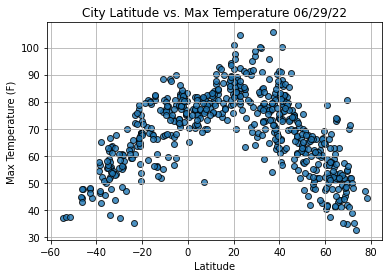

In [17]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

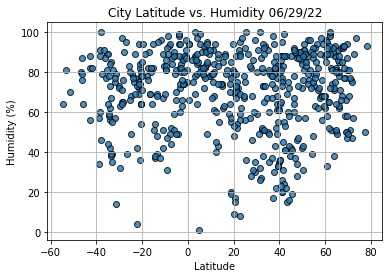

In [18]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

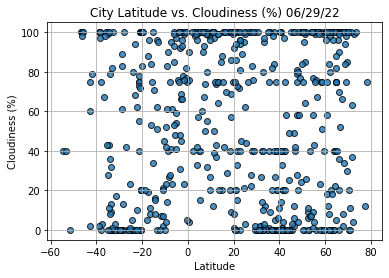

In [19]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

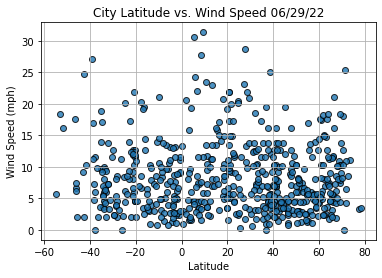

In [20]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()